In [1]:
import os
import pyxdf
import numpy as np
import mne
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from psychopy_experiments.brand_associations.brands_wordlist import WORDLIST
from pathlib import Path
from src.UnicornData import UnicornData

In [2]:
instagram_wordlist = WORDLIST['instagram']
linkedin_wordlist = WORDLIST['linkedin']
unrelated_wordlist = WORDLIST['unrelated']
CATEGORY_MAP = {item: k for k, v in WORDLIST.items() for item in v}

In [3]:
data_path = '../../data/brand_associations'
data_file = 'brand_associations_levan'
os.listdir(data_path)

['brand_associations_test.csv',
 'brand_associations_eleni.xdf',
 'brand_associations_raindi.csv',
 'brand_associations_eleni.csv',
 'brand_associations_test.xdf',
 'brand_associations_raindi.xdf',
 'brand_associations_dato.xdf',
 'brand_associations_tika.xdf',
 'brand_associations_avto.xdf',
 'brand_associations_luka.csv',
 'brand_associations_gio.xdf',
 'brand_associations_maria.csv',
 'brand_associations_levan.csv',
 'brand_associations_avto.csv',
 'brand_associations_tika.csv',
 'brand_associations_dato.csv',
 'brand_associations_luka.xdf',
 'brand_associations_levan.xdf',
 'brand_associations_gio.csv',
 'brand_associations_maria.xdf']

In [4]:
csv_data = pd.read_csv(f'{data_path}/{data_file}.csv')
csv_data

,timestamp_iso,trial_index,brand,target,prime_time_s,target_time_s,resp_window_s,resp_key,rt_ms_from_target
0,2025-12-04T06:21:23.449,0,instagram,კონტაქტი,0.16,0.16,1.5,NaN,NaN
1,2025-12-04T06:21:26.347,1,instagram,ლაიქი,0.16,0.16,1.5,right,1312.00
2,2025-12-04T06:21:29.261,2,instagram,სივი,0.16,0.16,1.5,NaN,NaN
3,2025-12-04T06:21:32.191,3,instagram,ლურჯი,0.16,0.16,1.5,NaN,NaN
4,2025-12-04T06:21:35.171,4,linkedin,ბალიში,0.16,0.16,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
115,2025-12-04T06:27:06.068,115,linkedin,აგური,0.16,0.16,1.5,left,313.33
116,2025-12-04T06:27:08.965,116,instagram,აგური,0.16,0.16,1.5,right,267.84
117,2025-12-04T06:27:11.879,117,instagram,რილსები,0.16,0.16,1.5,NaN,NaN
118,2025-12-04T06:27:14.793,118,instagram,ვიდეოები,0.16,0.16,1.5,NaN,NaN


In [5]:
csv_data['category'] = csv_data['target'].map(CATEGORY_MAP).fillna('unknown')

In [6]:
CONST_OFFSET = 0.073  # Delay measured with photodiode that day
xdf_path = f'{data_path}/{data_file}.xdf'
data = UnicornData(xdf_path, delay=CONST_OFFSET)
subject_name = Path(xdf_path).stem.replace('_brand', '').capitalize()

Markers 218
Data 113720
Creating RawArray with float64 data, n_channels=8, n_times=113720
    Range : 0 ... 113719 =      0.000 ...   454.876 secs
Ready.


In [7]:
raw = data.filter().raw
raw

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


<RawArray | 8 x 113720 (454.9 s), ~7.0 MB, data loaded>

In [8]:
TARGET_MARKER = 1
RESPONSE_MARKER = 2

In [9]:
events = data.events

In [10]:
# Define reject criteria
reject_criteria = dict(
    eeg=100e-6,  # 100 µV
)

In [11]:
picks = ["Cz", "Pz"]
event_dict = dict(target=1)
tmin, tmax = -0.2, 1.01
epochs = data.create_epochs(picks, event_dict, tmin, tmax, reject_criteria)

Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 303 original time points ...
    Rejecting  epoch based on EEG : ['Cz', 'Pz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz', 'Pz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz', 'Pz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Cz', 'Pz']
    Rejecting  epoch based on EEG : ['Cz', 'Pz']
    Rejecting  epoch based on EEG : ['Cz', 'Pz']
12 bad epochs dropped


In [12]:
# Get indices for non-rejected epochs
drop_log = epochs.drop_log
drop_log_not_ignored = [log for log in drop_log if 'IGNORED' not in log]
good_epoch_indices = [i for (i, log) in enumerate(drop_log_not_ignored) if len(log) == 0]

In [13]:
# Keep only non-rejected epochs and events from CSV data
csv_data = csv_data.iloc[good_epoch_indices].reset_index(drop=True)
events = events[good_epoch_indices]
csv_data

,timestamp_iso,trial_index,brand,target,prime_time_s,target_time_s,resp_window_s,resp_key,rt_ms_from_target,category
0,2025-12-04T06:21:26.347,1,instagram,ლაიქი,0.16,0.16,1.5,right,1312.00,instagram
1,2025-12-04T06:21:29.261,2,instagram,სივი,0.16,0.16,1.5,NaN,NaN,linkedin
2,2025-12-04T06:21:32.191,3,instagram,ლურჯი,0.16,0.16,1.5,NaN,NaN,linkedin
3,2025-12-04T06:21:38.103,5,linkedin,ლაქტოზა,0.16,0.16,1.5,NaN,NaN,unrelated
4,2025-12-04T06:21:41.032,6,linkedin,ბალიში,0.16,0.16,1.5,left,1479.57,unrelated
...,...,...,...,...,...,...,...,...,...,...
103,2025-12-04T06:27:06.068,115,linkedin,აგური,0.16,0.16,1.5,left,313.33,unrelated
104,2025-12-04T06:27:08.965,116,instagram,აგური,0.16,0.16,1.5,right,267.84,unrelated
105,2025-12-04T06:27:11.879,117,instagram,რილსები,0.16,0.16,1.5,NaN,NaN,instagram
106,2025-12-04T06:27:14.793,118,instagram,ვიდეოები,0.16,0.16,1.5,NaN,NaN,instagram


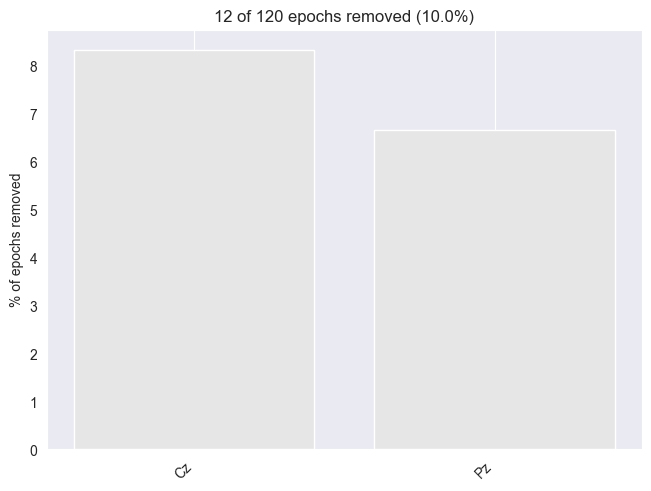

In [14]:
epochs.plot_drop_log(show=True);

In [15]:
# Optional: leave only first unique occurrence of each brand x target pairs
first_indices = csv_data[['brand', 'target']].drop_duplicates(keep='first').index.values
# first_indices = csv_data[['brand', 'target']].drop_duplicates(keep='last').index.values
csv_data = csv_data.iloc[first_indices].reset_index(drop=True)
epochs = epochs[first_indices]
events = events[first_indices]

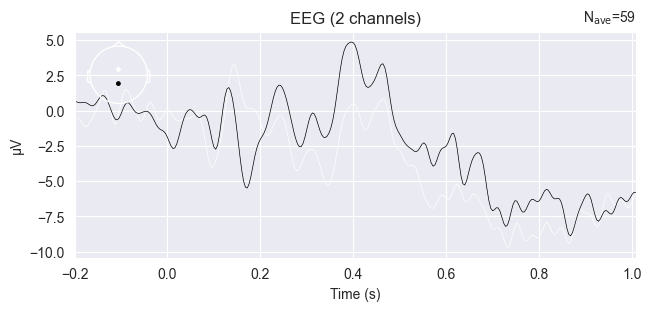

In [16]:
epochs.average().plot(picks=picks)
plt.show()

combining channels using "mean"


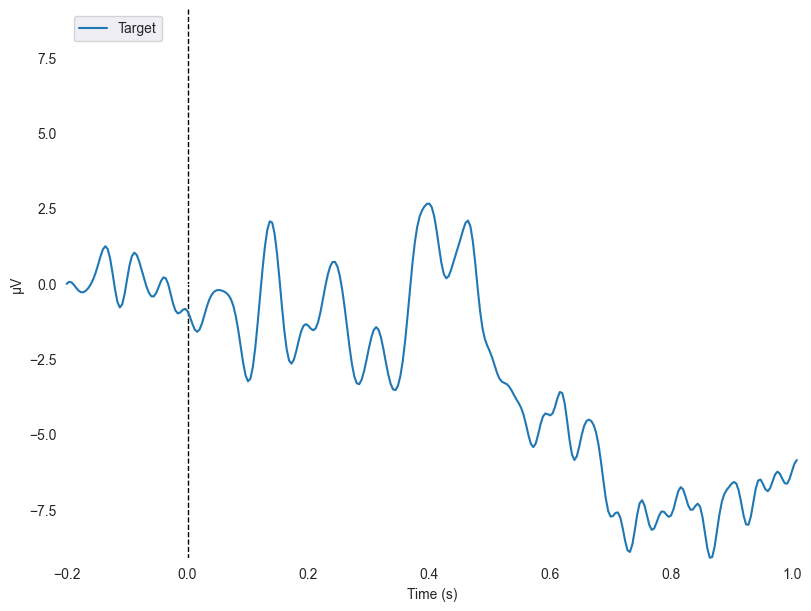

[<Figure size 800x600 with 1 Axes>]

In [17]:
mne.viz.plot_compare_evokeds(
    {"Target": epochs['target'].average()},
    combine='mean',
    show=True
)

In [18]:
instagram_idx = csv_data[csv_data['brand'] == 'instagram'].index.values
linkedin_idx = csv_data[csv_data['brand'] == 'linkedin'].index.values

instagram_words_idx = csv_data[csv_data['target'].isin(instagram_wordlist)].index.values
linkedin_words_idx = csv_data[csv_data['target'].isin(linkedin_wordlist)].index.values
unrelated_words_idx = csv_data[csv_data['target'].isin(unrelated_wordlist)].index.values

response_idx = csv_data[~csv_data['resp_key'].isna()].index.values

# Interesting epochs:
# 1. Everything with response
# 2. For each brand (facebook_idx, youtube_idx):
# 2.1. Facebook words (facebook_words_idx)
# 2.2. Youtube words (youtube_words_idx)
# 2.3. Shared words (shared_words_idx)
# 2.4. Unrelated words (unrelated_words_idx)
filt_ig_idx = np.intersect1d(response_idx, instagram_idx)
filt_li_idx = np.intersect1d(response_idx, linkedin_idx)
ig_ig_words_idx = np.intersect1d(filt_ig_idx, instagram_words_idx)
ig_li_words_idx = np.intersect1d(filt_ig_idx, linkedin_words_idx)
ig_un_words_idx = np.intersect1d(filt_ig_idx, unrelated_words_idx)
li_ig_words_idx = np.intersect1d(filt_li_idx, instagram_words_idx)
li_li_words_idx = np.intersect1d(filt_li_idx, linkedin_words_idx)
li_un_words_idx = np.intersect1d(filt_li_idx, unrelated_words_idx)
ig_instagram = epochs[ig_ig_words_idx]
ig_linkedin = epochs[ig_li_words_idx]
ig_unrelated = epochs[ig_un_words_idx]
li_instagram = epochs[li_ig_words_idx]
li_linkedin = epochs[li_li_words_idx]
li_unrelated = epochs[li_un_words_idx]

In [25]:
unrelated = np.intersect1d(response_idx, unrelated_words_idx)
related = np.union1d(ig_ig_words_idx, li_li_words_idx)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
mne.viz.plot_compare_evokeds(
    {"Instagram (instagram)": ig_instagram.average(), "Instagram (linkedin)": ig_linkedin.average(),
    "Instagram (unrelated)": ig_unrelated.average()},
    picks=picks,
    combine='mean',
    show=True,
    axes=ax
)

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


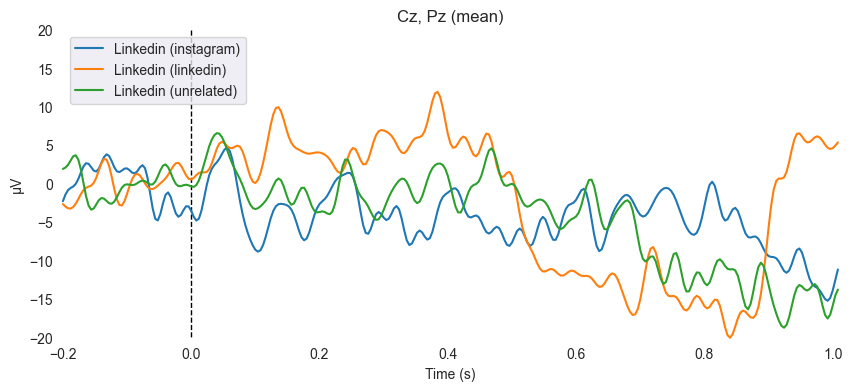

[<Figure size 1000x400 with 1 Axes>]

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
mne.viz.plot_compare_evokeds(
    {"Linkedin (instagram)": li_instagram.average(), "Linkedin (linkedin)": li_linkedin.average(),
    "Linkedin (unrelated)": li_unrelated.average()},
    picks=picks,
    combine='mean',
    show=True,
    axes=ax
)

## Beamformer stLCMV

In [22]:
# --- compatibility patch for old-style LinearModel._preprocess_data used by posthoc.Beamformer ---
from sklearn.linear_model._base import LinearModel, _preprocess_data as _skl_preprocess_data

def _preprocess_data_compat(*args, **kwargs):
    # posthoc passes "normalize=...", which no longer exists; just drop it
    kwargs.pop("normalize", None)
    return _skl_preprocess_data(*args, **kwargs)

# attach as a staticmethod so calls like LinearModel._preprocess_data(...) work
LinearModel._preprocess_data = staticmethod(_preprocess_data_compat)
# --- end compatibility patch ---

import numpy as np
from posthoc import Beamformer
from posthoc.cov_estimators import ShrinkageKernel
from sklearn import metrics
from matplotlib import pyplot as plt

In [23]:
event_dict = dict(target=1)
# reject_criteria = dict(
#     eeg=100e-6,
# )
reject_criteria = None
raw_resampled, events_resampled = raw.copy().resample(50, events=events)
epochs = mne.Epochs(raw_resampled, events_resampled, event_dict, tmin=-0.2, tmax=1.01,
                    baseline=(-0.2, 0), preload=True, reject=reject_criteria)
unrel_epochs = epochs[unrelated]
rel_epochs = epochs[related]
merged_epochs = mne.concatenate_epochs([unrel_epochs, rel_epochs])
print(f"Using {len(epochs)} epochs for beamformer template.")

Not setting metadata
29 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 29 events and 61 original time points ...
0 bad epochs dropped


IndexError: index 29 is out of bounds for axis 0 with size 29

In [72]:
unrelated, related

(array([ 4,  6,  9, 15, 19, 25, 29, 30, 32, 33, 34, 35, 36, 38, 44, 52]),
 array([ 0,  7, 10, 17, 20, 22, 24, 26, 27, 28, 31, 37, 39, 41, 50, 53]))

In [73]:
unrel_epochs.get_data().shape, rel_epochs.get_data().shape

((16, 8, 61), (16, 8, 61))

In [74]:
len(unrelated), len(related)

(16, 16)

In [75]:
X = merged_epochs.get_data().reshape(len(merged_epochs), -1)
y = np.array(len(unrel_epochs) * [1] + len(rel_epochs) * [2])
X.shape, y.shape

((32, 488), (32,))

In [76]:
evoked_unrel = X[y == 1].mean(axis=0)
evoked_rel = X[y == 2].mean(axis=0)
template = evoked_rel - evoked_unrel

Text(0.5, 1.0, 'Original template')

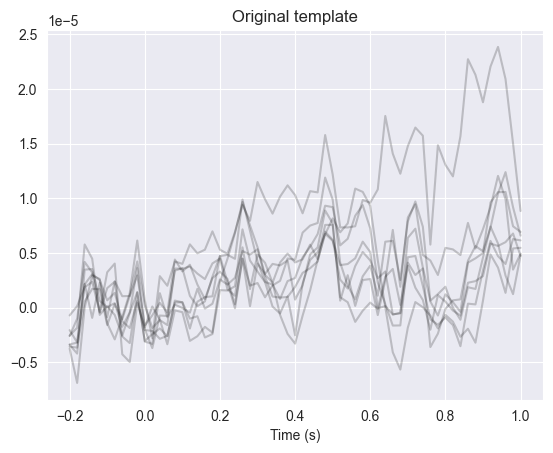

In [77]:
# This creates a (channels x time) view of the template
template_ch_time = template.reshape(epochs.info['nchan'], -1)
# Plot the template
plt.figure()
plt.plot(epochs.times, template_ch_time.T, color='black', alpha=0.2)
plt.xlabel('Time (s)')
plt.title('Original template')

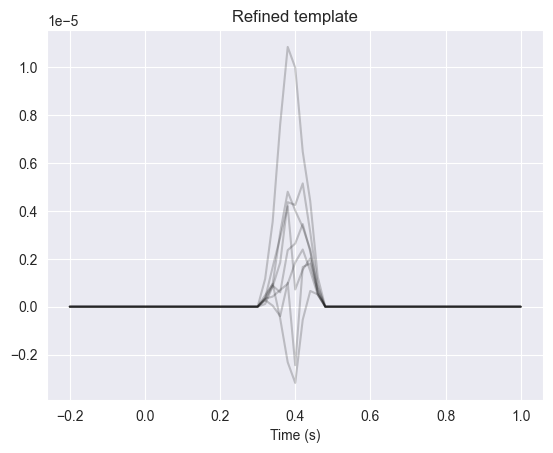

In [78]:
center = np.searchsorted(merged_epochs.times, 0.400)
width = 10
window = np.zeros(len(merged_epochs.times))
window[center - width // 2: center + width // 2] = np.hanning(width)
template_ch_time *= window[np.newaxis, :]
refined_template = template_ch_time.reshape(-1)

# Plot the refined template
plt.figure()
plt.plot(merged_epochs.times, template_ch_time.T, color='black', alpha=0.2)
plt.xlabel('Time (s)')
plt.title('Refined template')
plt.show()

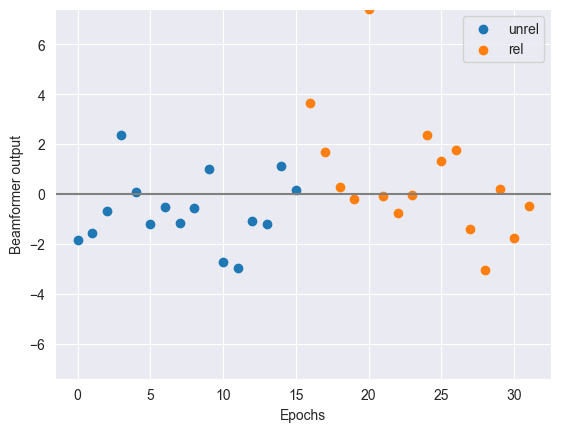

In [79]:
beamformer = Beamformer(refined_template, cov=ShrinkageKernel(1.0)).fit(X)

y_hat = beamformer.predict(X).ravel()

# Visualize the output of the LCMV beamformer
y_unrel = y_hat[y == 1]
y_rel = y_hat[y == 2]
lim = np.max(np.abs(y_hat))
plt.figure()
plt.scatter(np.arange(len(y_unrel)), y_unrel)
plt.scatter(np.arange(len(y_unrel), len(y_unrel) + len(y_rel)), y_rel)
plt.legend(['unrel', 'rel'])
plt.axhline(0, color='gray')
plt.ylim(-lim, lim)
plt.xlabel('Epochs')
plt.ylabel('Beamformer output')

# Assign the 'left' class to values above 0 and 'right' to values below 0
y_bin = np.zeros(len(y_hat), dtype=np.int32)
y_bin[y_hat >= 0] = 1
y_bin[y_hat < 0] = 2

# Z-scores

[-0.89693564 -0.76224304 -0.3329177   1.12832728  0.04033143 -0.58005066
 -0.25900598 -0.56487433 -0.27206725  0.48874568 -1.32098751 -1.42742021
 -0.53015803 -0.57771984  0.54492781  0.08482209  1.7577427   0.81468807
  0.12770384 -0.10432805  3.56725192 -0.03610147 -0.37167366 -0.01365376
  1.14206726  0.63806251  0.85169888 -0.67952462 -1.47606867  0.08782742
 -0.84286724 -0.22559925]
16 16


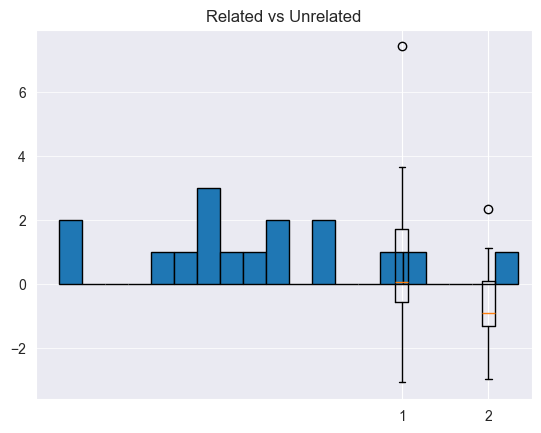

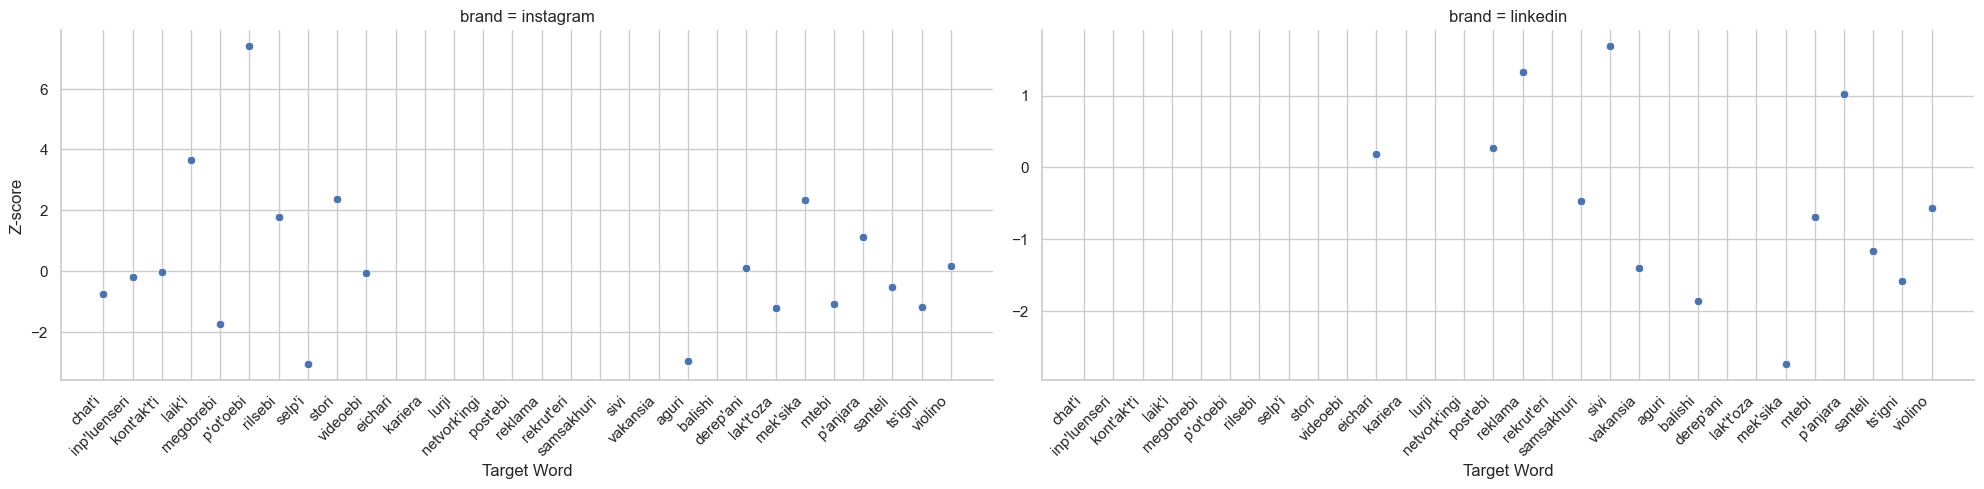

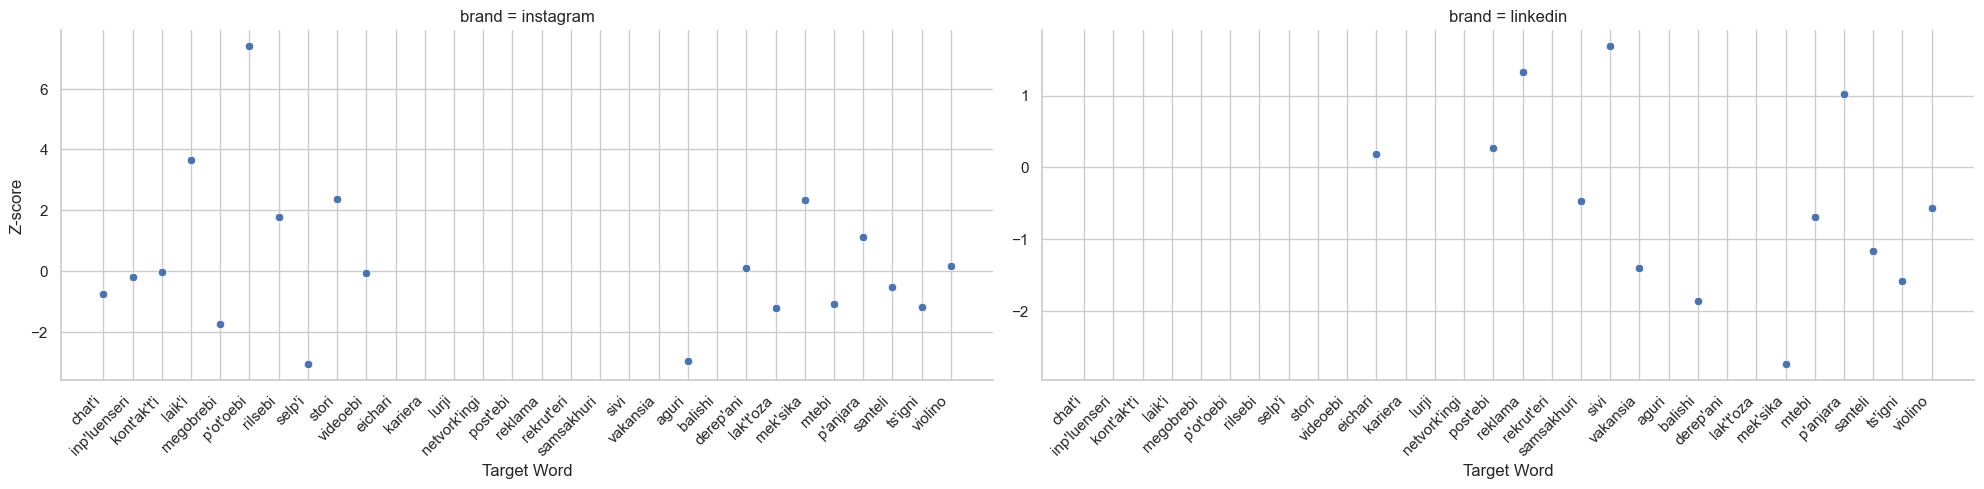

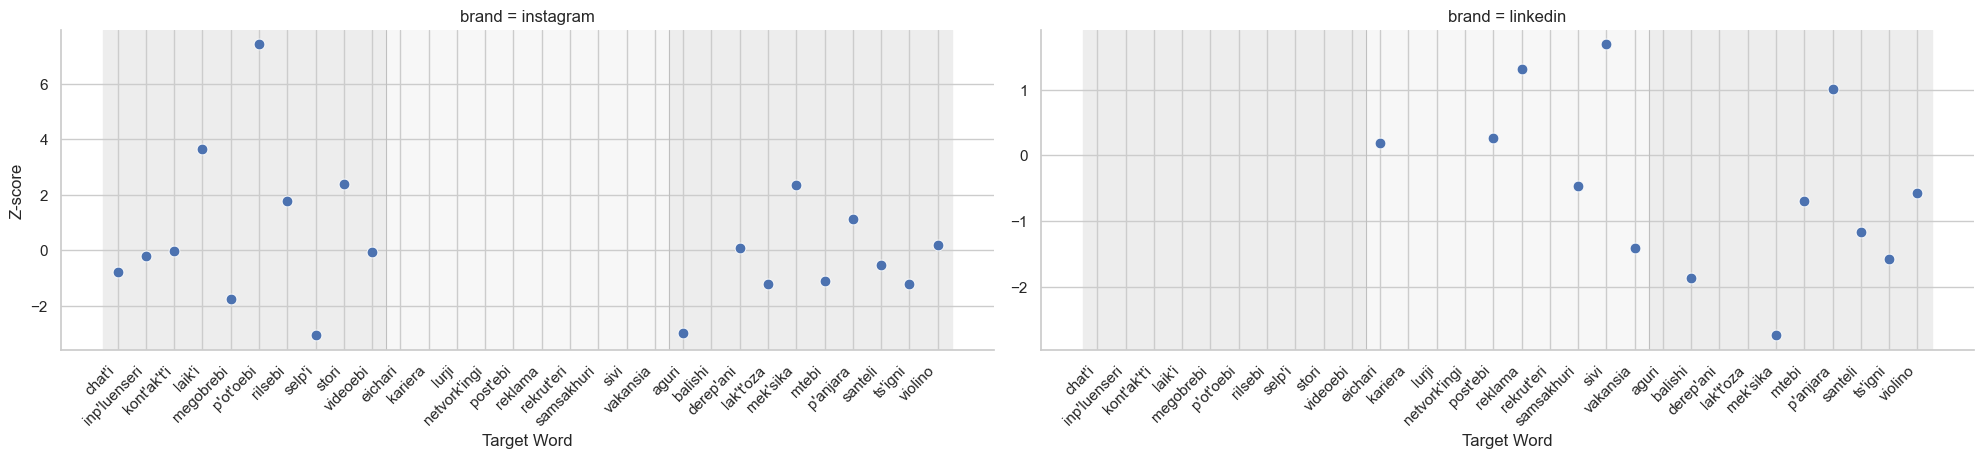

In [80]:
# import numpy as np
# import mne
# from sklearn.preprocessing import StandardScaler
#
# # --------------------------------------------------------
# # 0. Assume you already have:
# #    - epochs: MNE Epochs, shape (n_trials, n_channels, n_times)
# #    - epochs.metadata["category"] with values like "Television", "Relaxation", "Price", "Unrelated"
# #    - epochs.metadata["subject"] with subject IDs
# # --------------------------------------------------------
#
# # 1) Select unrelated trials to build the N400 template
# unrel_epochs = epochs[unrelated]
# # if len(unrel_epochs) < 30:
# #     raise ValueError(f"Not enough unrelated trials to build a template. ({len(unrel_epochs)})")
#
# # 2) Compute the average ERP of unrelated trials
# unrel_evoked = unrel_epochs.average()  # shape (n_channels, n_times)
# data = unrel_evoked.data  # numpy array
# # 3) Define N400 time window (adjust to your data!)
# # typical N400: 300–500 ms
# tmin_n400, tmax_n400 = 0.3, 0.5
# tmask = (unrel_evoked.times >= tmin_n400) & (unrel_evoked.times <= tmax_n400)
#
# # 4) Build temporal template = average over channels in N400 window
# temporal_template = data.mean(axis=0)[tmask]  # shape (n_times_in_window,)
# # normalize to avoid scaling issues
# temporal_template = temporal_template / np.linalg.norm(temporal_template)
#
# # 5) Build spatial template = average over time in N400 window
# spatial_template = data[:, tmask].mean(axis=1)  # shape (n_channels,)
# spatial_template = spatial_template / np.linalg.norm(spatial_template)
# # (This gives us separate spatial and temporal “shapes” of the N400)
#
# # --------------------------------------------------------
# # 6) Now compute a single-trial N400 “score” for every NON-unrelated trial
# #    We'll do a simple separable projection:
# #    score = (spatial dot trial * temporal dot trial_window)
# #    which mimics “how much this trial looks like the N400 template”.
# # --------------------------------------------------------
# # select trials we want to score
# epochs_keep = epochs
#
# n_trials = len(epochs_keep)
# n400_scores = []
#
# for ep in epochs_keep:  # ep: (n_channels, n_times)
#     ep_data = ep
#     # project spatially
#     spatial_proj = np.dot(spatial_template, ep_data)  # shape (n_times,)
#     # take N400 window
#     trial_win = spatial_proj[tmask]
#     # project temporally
#     n400_val = np.dot(trial_win, temporal_template)   # scalar
#     n400_scores.append(n400_val)
#
# n400_scores = np.array(n400_scores)
# n400_scores
# # --------------------------------------------------------
# # 7) Z-score per subject
# # --------------------------------------------------------
# # n400_z = np.zeros_like(n400_scores, dtype=float)
# n400_scores = y_hat
# n400_z = np.zeros_like(y_hat, dtype=float)
#
# # z-score
# mean_ = n400_scores.mean()
# std_ = n400_scores.std(ddof=1)
# if std_ == 0:
#     # fallback: no variance
#     n400_z = 0.0
# else:
#     n400_z = (n400_scores - mean_) / std_
#
# print(n400_z)
# # related_n400_z = n400_scores[:len(related)]
# # unrelated_n400_z = n400_scores[len(related):]
# unrelated_n400_z = n400_scores[:len(unrelated)]
# related_n400_z = n400_scores[len(unrelated):]
# print(len(unrelated_n400_z), len(related_n400_z))
# plt.boxplot([related_n400_z, unrelated_n400_z])
# plt.hist(unrelated_n400_z, bins=20, edgecolor='black')
# plt.title('Related vs Unrelated')
# plt.grid(axis='y', alpha=0.75)
# plt.show()
# # csv_data.iloc[related]['score'] = n400_scores
# csv_data.loc[unrelated, 'zscore'] = unrelated_n400_z
# csv_data.loc[related, 'zscore'] = related_n400_z
# # Build a translation table (Unicode codepoint → replacement string)
# GE_TO_LAT = {
#     ord('ა'): 'a',  ord('ბ'): 'b',   ord('გ'): 'g',   ord('დ'): 'd',
#     ord('ე'): 'e',  ord('ვ'): 'v',   ord('ზ'): 'z',   ord('თ'): 't',
#     ord('ი'): 'i',  ord('კ'): 'k',   ord('ლ'): 'l',   ord('მ'): 'm',
#     ord('ნ'): 'n',  ord('ო'): 'o',   ord('პ'): 'p',   ord('ჟ'): 'zh',
#     ord('რ'): 'r',  ord('ს'): 's',   ord('ტ'): "t'",  ord('უ'): 'u',
#     ord('ფ'): "p'", ord('ქ'): "k'",  ord('ღ'): 'gh',  ord('ყ'): "q'",
#     ord('შ'): 'sh', ord('ჩ'): 'ch',  ord('ც'): 'ts',  ord('ძ'): 'dz',
#     ord('წ'): "ts'",ord('ჭ'): "ch'", ord('ხ'): 'kh',  ord('ჯ'): 'j',
#     ord('ჰ'): 'h',
# }
#
# def georgian_to_latin_series(s: pd.Series) -> pd.Series:
#     return s.astype(str).str.translate(GE_TO_LAT)
#
# csv_data['target_latin'] = georgian_to_latin_series(csv_data['target'])
# # pdata = csv_data.groupby(['brand', 'category', 'target_latin'])[['score', 'zscore']].mean()
# pdata = csv_data.groupby(['brand', 'category', 'target_latin'])[['zscore']].mean()
# # Assuming pdata was created as described
# # Reset index so 'brand' and 'target' become columns
# pdata_reset = pdata.reset_index()
#
# # Set plot style
# sns.set(style="whitegrid")
#
# # Alternative plot using zscore instead
# g = sns.FacetGrid(pdata_reset, col="brand", height=5, sharey=False, aspect=2)
# g.map_dataframe(sns.scatterplot, x="target_latin", y="zscore")
# g.set_xticklabels(rotation=45, ha='right')
# g.set_axis_labels("Target Word", "Z-score")
# plt.subplots_adjust(hspace=0.3, bottom=0.25, top=0.95)
# # plt.tight_layout()
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# # Assuming pdata was created as described
# # Reset index so 'brand' and 'target' become columns
# pdata_reset = pdata.reset_index()
#
# # Set plot style
# sns.set(style="whitegrid")
#
# # Alternative plot using zscore instead
# g = sns.FacetGrid(pdata_reset, col="brand", height=5, sharey=False, aspect=2)
# g.map_dataframe(sns.scatterplot, x="target_latin", y="zscore")
# g.set_xticklabels(rotation=45, ha='right')
# g.set_axis_labels("Target Word", "Z-score")
# plt.subplots_adjust(hspace=0.3, bottom=0.25, top=0.95)
# # plt.tight_layout()
# # Order targets by category and add category banding on the x-axis
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# # pdata as in your code; reset for plotting
# pdata_reset = pdata.reset_index()
#
# # Category order
# CAT_ORDER = ['instagram', 'linkedin', 'unrelated']
#
# # Build target order within categories (alphabetical)
# word_order = []
# for c in CAT_ORDER:
#     w = (pdata_reset.loc[pdata_reset['category'] == c, 'target_latin']
#                      .drop_duplicates()
#                      .sort_values(key=lambda s: s.str.lower()))
#     word_order.extend(w.tolist())
#
# # Encode ordered categories for x
# pdata_reset['target_latin'] = pd.Categorical(pdata_reset['target_latin'],
#                                              categories=word_order, ordered=True)
# x_index = {w: i for i, w in enumerate(word_order)}
# pdata_reset['x_pos'] = pdata_reset['target_latin'].map(x_index).astype(int)
#
# # Precompute category intervals (start/end indices on x)
# word2cat = dict(pdata_reset[['target_latin', 'category']].drop_duplicates().values)
# bounds = []
# start = 0
# cur = word2cat[word_order[0]]
# for i, w in enumerate(word_order):
#     c = word2cat[w]
#     if c != cur:
#         bounds.append((cur, start, i - 1))
#         cur, start = c, i
# bounds.append((cur, start, len(word_order) - 1))
#
# # Plot
# sns.set(style="whitegrid")
# g = sns.FacetGrid(pdata_reset, col="brand", height=5, sharey=False, aspect=2)
# g.map_dataframe(sns.scatterplot, x="x_pos", y="zscore", s=60)
#
# # Ax cosmetics: ticks, labels, category shading
# for ax in g.axes.flat:
#     # alternating category bands
#     for j, (cat, a, b) in enumerate(bounds):
#         ax.axvspan(a - 0.5, b + 0.5, color=str(0.93 + 0.04*(j % 2)), alpha=1.0, zorder=0)
#         if j < len(bounds) - 1:
#             ax.axvline(b + 0.5, color='0.75', lw=0.8, zorder=1)
#
#     # ticks and ticklabels
#     ax.set_xticks(np.arange(len(word_order)))
#     ax.set_xticklabels(word_order, rotation=45, ha='right')
#
# g.set_axis_labels("Target Word", "Z-score")
# plt.subplots_adjust(hspace=0.35, bottom=0.28, top=0.92, wspace=0.05)
# plt.show()